# Regression Model that Predicts Apple Prices Based on Historical Data

<img src="predict.jpeg" height=400>

# Table Of Contents
### 1. [Introduction](#introduction)

    1.1 Problem Statement
    1.2 Objective
    1.3 Team Members
    1.4 Data Source and Descriptions
    1.5 Submission format
    
### 2. [Exploratory data analysis](#explore)

    2.1 Import necessary packages
    2.2 Import the data into a Pandas Dataframe
    2.3 Showing the data filtered for Golden Delicious
    2.4 Make ean initial plot of the data
    2.5 Exploring the data shape, types and testing for null values
    2.6 How the testing data differs from training data
    2.7 Descriptive statistics of each feature
    2.8 Calculating the kurtosis and skew of the data  
    2.9 More univariate graphical analysis
    2.10 Considering correlation between parameters   
    2.11 Insights from an in-colour scatter plot

### 3. [Data Preprocessing](#pre)

    3.1 Dropping outliers
    3.2 Transforming categorical data to numerical data
    3.3 Dropping highly correlated columns
    3.4 Setting Variance Thresholds  
    3.5 Variable Selection by Correlation and Significance
    
### 4. [Data splitting](#split)   

### 5. [Building and assessing regression models](#import)

    5.1 A simple linear reggression model following the Least Squares Method
        5.1.1 Description of the model
        5.1.2 Calculating the slope and the intercept
        5.1.3 Plotting our regression line on a scatter plot
        5.1.4 Assessing our results
        5.1.5 Conclusion
        
    5.2 A multivariate linear regression model using sklearn Linear Regression
        5.2.1 Description of model
        5.2.2 Building and fitting the model
        5.2.3 Assessing our results
        5.2.4 Making predictions on the test data
        5.2.5 Conclusion
        
    5.3 A multivariate linear regression model using statsmodels
        5.3.1 Description of the model
        5.3.2 Building and training the model
        5.3.3 Assessing our results
        5.3.4 Conclusion
        
    5.4 Multivariate regression model uing sklearn.SVR
        5.4.1 Description of the model
        5.4.2 Building and fitting the model
        5.4.3 Assessing our results
        5.4.4 Making predictions on the test data
        5.4.5 Conclusion
        
    5.5 Multivariate regression model using sklearn.decisiontreeregressor
        5.5.1 Description of the model
        5.5.2 Building and fitting the model    
        5.5.3 Assessing our results
        5.5.4 Conclusion
        
    5.6 Ensemble model: Voting
        5.6.1 Description of the model
        5.6.2 Building and fitting the model        
        5.6.3 Assessing our results
        5.6.4 Making predictions on the test data    
        5.6.5 Conclusion
    
    5.7 Random Forest
        5.7.1 Description of the model
        5.7.2 Building and fitting the model  
        5.7.3 Assessing our results
        5.7.4 Making predictions on the test data
        5.7.5 Conclusion
        
    5.8 Adaboost Classifier  
        5.8.1 Description of the model 
        5.8.2 Building and fitting the model
        5.8.3 Assessing our results
        5.8.4 Conclusion
        
    
        
### 6. [Conclusion](#conclude)
    6.1 Steps we took
    6.2 Our results
    6.3 What we learnt

## 1. Introduction <a name="introduction"></a>

### 1.1. Problem statement 
Sellers of commodities do not know how much to charge for their stock to make for maximum profit. Charging too high will lead to them not selling all their stock and it decaying. Charging too low will mean they cut into their profit.

### 1.2. Our objective 
We want to design various multivariate regression models using different machine learning techniques to predict the cost of apples based on given historical data. 

Our objective is further to train our models with the data, to assess our models, and to choose the model that best predicts the prices of apples. 

We further want to upload our best model to Kaggle in order to encourage competition.

Finally we will communicate our findings via PowerPoint to an assessment board and via an API hosted in AWS EC2 to the world.

### 1.3. Team members
The team consists of five full-time students from Explore Data Science Academy who come from all walks of life and have been placed in a team for about 4 weeks under the supervision of Trevor Senyane.
1. Jacques Stander - group coordinator
2. Khomotso Maake
3. Keletso Pule
4. Harrison Hlongwane
5. Bhalisa Sodo

### 1.4. Data source and descriptions
Durban Fresh Produce has more than 60 000 transactions on the sale of commodities and has made it available publicly. We will use this data to train our machine learning models on and to assess them by it.

This data has been made availalbe for us on Kaggle in the form of a CSV file which we could download. The data consists of 10 columns and is described as follows:
1. Province - Which province the produce was grown
2. Container - The code for the type of container
3. Size_Grade - The class of the produce according to their quality
4. Weight_Kg - The total weight in kilograms
5. Commodities - The type of produce, e.g. Golden Delicious Apples
6. Date - The date of the sale
7. Sales_Total - The total sales price
8. Total_Qty_Sold - The number of produce sold
9. Total_Kg_Sold - The total weight of the produce sold in kilograms
10. Stock_On_Hand - The amount of produce the store has`

### 1.5. Submission format

The following table indicates the format in which we need to structure our final answer in submitting onto Kaggle. 

In [1]:
import pandas as pd
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
sample_submission.head()

,Index,avg_price_per_kg
0,1,13.94
1,2,1.30


## 2. Exploratory Data Analysis <a name="explore"></a>

### 2.1. Importing the necessary packages

In [2]:
# These packages will be mainly used for data wrangling. Pandas is already imported.
import numpy as np

# These packages will be mostly used for plotting the data
from matplotlib import pyplot as plt
import seaborn as sns

# These packages will be mostly used to build our linear regression model so that we can make predictions from it.
import statsmodels as sm
import sklearn as skl

### 2.2. Importing the data into a Pandas Dataframe

In [3]:
#import train and test sets into DataFrames
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
test_set = pd.DataFrame(pd.read_csv("df-test_set.csv"))
train_set = pd.DataFrame(pd.read_csv("df-train_set.csv"))

### 2.3. Showing the table head filtered for Apple Golden Delicious
We filter for Apple Golden Delicious, becuase we noted that out testing data only considers this commodity.

In [4]:
#Filter for Commodity of interest in train set
train_set = train_set[train_set["Commodities"]=="APPLE GOLDEN DELICIOUS"]

In [5]:
#Viewing the first five rows of our train_set dataframe.
train_set.head() 

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [6]:
test_set.iloc[581:582,:]

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
581,582,CAPE,M9125,1X,12.5,APPLE GOLDEN DELICIOUS,2020-05-26,65.0,65.0,4225.0,65,812.5,0


In [7]:
test_set.iloc[186:187,:]

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
186,187,EASTERN CAPE,DT063,2M,6.3,APPLE GOLDEN DELICIOUS,2020-09-28,40.0,40.0,1880.0,47,296.1,14


In [8]:
test_set.iloc[663:664,:]

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
663,664,NATAL,DT063,2S,6.3,APPLE GOLDEN DELICIOUS,2020-01-14,10.0,10.0,10.0,1,6.3,0


### 2.4. Making initial plots of the data to learn more of the data

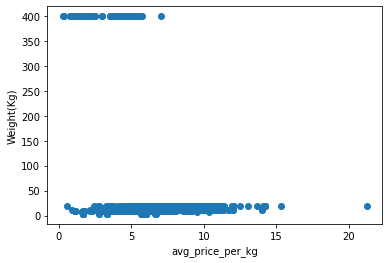

In [9]:
plt.scatter(train_set["avg_price_per_kg"], train_set['Weight_Kg'])
plt.ylabel("Weight(Kg)")
plt.xlabel("avg_price_per_kg")
plt.show()

We note that most of the apples have a weight lower than 25 kilogram and a few have a high weight of exactly 400 kilogram with no values inbetween. Apples at exactly 400 kg are considerable lower priced. We also note one outlier where an apple was sold for near R25.

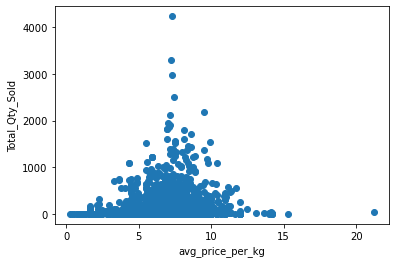

In [10]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Total_Qty_Sold'])
plt.ylabel("Total_Qty_Sold")
plt.xlabel("avg_price_per_kg")
plt.show()

We observe that for most of the average prices of apples per kilogram the total quantity sold is densley populated between 0-2000 apples with prices between R0-R15. There are a few outliers including one Total Quintity Sold of above 4000 apples.

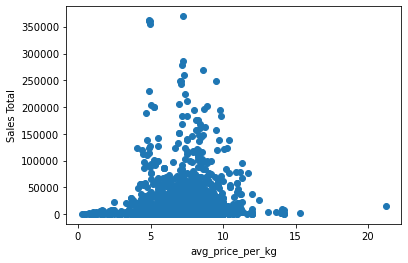

In [11]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Sales_Total'])
plt.ylabel("Sales Total")
plt.xlabel("avg_price_per_kg")
plt.show()

We observe that for most of the average prices the total sales is densley populated between R0-R200000. There are a few outliers once again of above R350 000.

### 2.5. Exploring the data shape, types and testing for null values

In [12]:
#The dataframe has 1952 rows and 13 columns.
train_set.shape

(1952, 13)

In [13]:
#The info method displays the nature of our data i.e datatypes and non-null count.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


The info summary above shows 1952 entries and it has the following data types: six float type data, two integer type data, five object type data with no null values.

### 2.6. How the  testing data differs from training data

In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [15]:
test_set.shape

(685, 13)

Our Test_set data has 685 rows and 13 columns, our rows are smaller than the train data as expected since the bulk of our data will go into training our model.

The data types also differ in our test data, we have five float type data, three integer type data, five object type data. All columns showing zero null values. In the training data there are six float type and two integer type data.

Test_set statistics vary from train_set ones as we are working with a smaller data set in our test data.

### 2.7. Descriptive statistics of each feature:

In [16]:
train_set.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


### 2.8. Calculating the kurtosis and skew of the data:

In [17]:
train_set.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

We observe that all the feautures are highly skewed in the positive direction except for the average price per kg (which is moderately skewed in a positive direction). For the high positive skewed feautures we have that mode < median < mean.

In [18]:
train_set.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

From the above, we observe that all the feautures have a high kurtosis besides the average price per kg. This indicates that all the feautures have a large number of outliers except for the average price.

### 2.9. More univariate graphical analysis


array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Sales_Total'}>]], dtype=object)

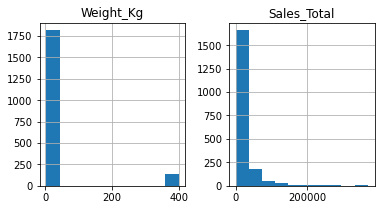

In [19]:
features = ['Weight_Kg', 'Sales_Total'] # create a list of all numerical features
train_set[features].hist(figsize=(6,3))

<AxesSubplot:xlabel='High_Price'>

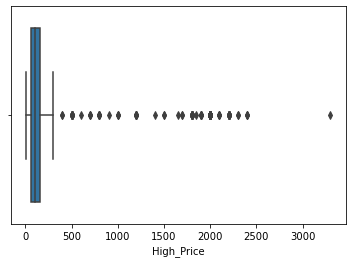

In [20]:
sns.boxplot(x='High_Price', data=train_set)

<AxesSubplot:xlabel='Low_Price'>

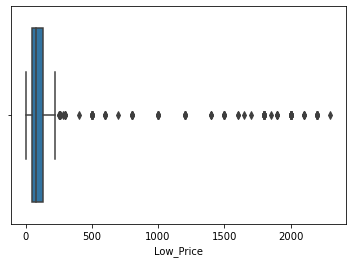

In [21]:
plt.subplot(sns.boxplot(x='Low_Price', data=train_set))

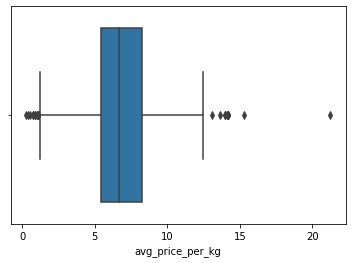

In [22]:
sns.boxplot(x='avg_price_per_kg', data=train_set);

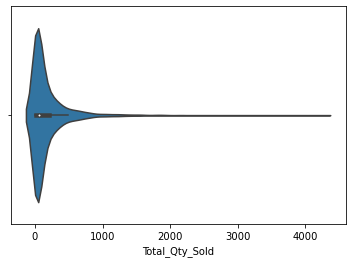

In [23]:
sns.violinplot(x='Total_Qty_Sold', data=train_set);

As expected, we observe that all the feautures are highly skewed to the right except for the average price per kg where outliers are taken into consideration.

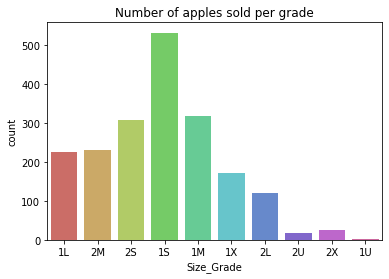

In [24]:
sns.countplot(x = 'Size_Grade', data = train_set, palette="hls")
plt.title("Number of apples sold per grade");

We see that the 1S size_Grade is the most sold.

### 2.10. Considering correlation between parameters 
We now examine the Pearson correlation between two variables:

#### 2.10.1 A non-graphical test

In [25]:
train_set.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


#### 2.10.1. By drawing a correlation heatmap

We can also show the Correlation between two variables using a heatmap and derive the same insights as above:

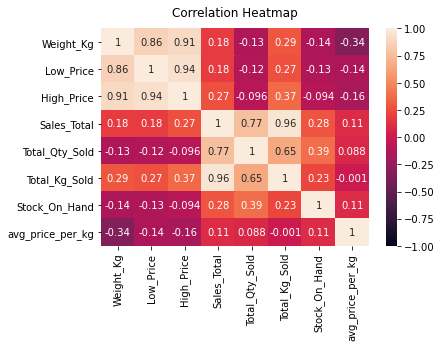

In [26]:
heatmap = sns.heatmap(train_set.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [27]:
train1 = train_set.copy()

#### 2.10.1 By testing for linearity with pairplots

In [28]:
# Import Neccessary Packages
from seaborn import pairplot
from statsmodels.graphics.correlation import plot_corr

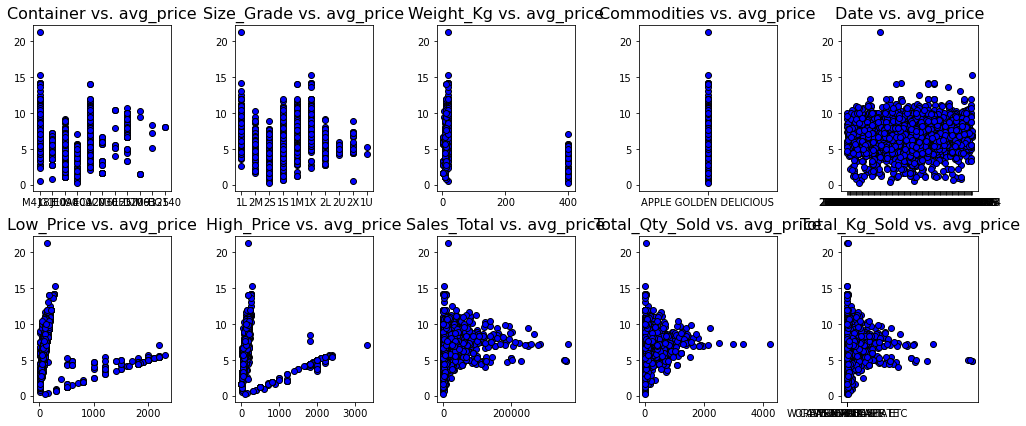

In [29]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.columns):
    if(index<=10):
        axs[index-1].set_title("{} vs. avg_price".format(column),fontsize=16)
        axs[index-1].scatter(x=train_set[column],y=train_set['avg_price_per_kg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

We observe that there is a strong corellation between the following variables only:
1. Weight, Low Price & High Price
2. Total Sales, Total Kg Sold & Quantity Sodl

We will have to drop at least four columns (two from each section mentioned above) so that our predictions depend fully on uncorrelated data.


### 2.11 Insights from an in-colour scatter plot

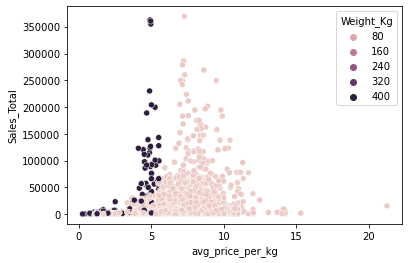

In [30]:
sns.scatterplot(x='avg_price_per_kg',y='Sales_Total',hue='Weight_Kg', data=train_set);

We observe that apples with a lower average price has a higher weight. We also observe that a lot of the apples which are sold have a low weight.

### 3. Data pre-processing <a name="pre"></a>

### 3.1. Dropping outliers

In [31]:
#Filter out outliers using Interquartile Range method
Q1 = train_set.quantile(0.25)
Q3 = train_set.quantile(0.75)
IQR = Q3 - Q1


#filter out the outliers
index = train_set[(train_set["avg_price_per_kg"] >= 15)].index
index2 = train_set[(train_set["avg_price_per_kg"] >7) & (train_set["Weight_Kg"] == 400)].index
index3 = train_set[(train_set["Total_Qty_Sold"] >2000)].index
#drop outliers
train_set.drop(index, inplace=True)
train_set.drop(index2, inplace=True)
train_set.drop(index3, inplace=True)                   

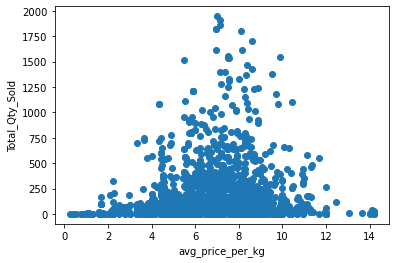

In [32]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Total_Qty_Sold'])
plt.ylabel("Total_Qty_Sold")
plt.xlabel("avg_price_per_kg")
plt.show()

### 3.2. Transforming categorical data to numerical data 

In [6]:
#Convert categorical data to numerical data
train = train_set.copy()
for i in train.index:
    train.loc[i,"Date"]=train.loc[i,"Date"][:7]
train = pd.get_dummies(train,drop_first=True)

#Replace spaces in column names with underscores
train.columns = train.columns.str.replace(' ','_')

In [7]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN_CAPE,Province_NATAL,...,Date_2020-01,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,0,0,0,0,0,0,0,1,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,1,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,1,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
train.shape

(1943, 43)

In [8]:
cols = list(train)
#Move column to last index
cols.insert(len(cols)-1,cols.pop(cols.index("avg_price_per_kg")))

#Update column names
train = train.loc[:, cols]

In [9]:
#Convert categorical data to numerical data
test_submission_set = test_set.copy()
for i in test_submission_set.index:
    test_submission_set.loc[i,"Date"]=test_submission_set.loc[i,"Date"][:7]
test_submission_set=pd.get_dummies(test_submission_set,drop_first=True)

#Replace spaces in column names with underscores
test_submission_set.columns = test_submission_set.columns.str.replace(' ','_')
test_submission_set.drop('Index', inplace = True, axis = 1)

#Showing the values
test_submission_set.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,...,Date_2020-01,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3.3. Dropping highly correlated columns

In [10]:
#
train.drop(columns=["Sales_Total", "Total_Kg_Sold","Low_Price","High_Price"],inplace=True,axis=1)


In [11]:
train.head()

,Weight_Kg,Total_Qty_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,...,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10,avg_price_per_kg
1,18.3,332,822,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.51
7,11.0,320,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4.55
24,9.0,18,1506,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6.11
40,18.3,388,443,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.51
69,400.0,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.50


In [40]:
train.shape

(1943, 39)

In [12]:
test_submission_set.drop(columns=["Sales_Total", "Total_Kg_Sold","Low_Price","High_Price"],inplace=True,axis=1)
test_submission_set.head()

,Weight_Kg,Total_Qty_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,...,Date_2020-01,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10
0,12.0,38,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,18.3,8,2,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,12.0,6,45,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.3,1,8,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18.3,100,19,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
test_submission_set.shape

(685, 38)

### 3.4. Setting Variance Thresholds

In [43]:
# Separate data into independent (X) and independent (y) variables
X_names = list(train.columns)
X_names.remove('avg_price_per_kg')
X_data = train[X_names]
y_data = train['avg_price_per_kg']

In [44]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [45]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [46]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
16,Container_M4183,0.210431
14,Container_JE090,0.206230
20,Size_Grade_1S,0.197192
10,Container_EC120,0.176015
7,Province_W.CAPE-BERGRIVER_ETC,0.175173
34,Date_2020-07,0.173189
19,Size_Grade_1M,0.137224
25,Size_Grade_2S,0.133390
30,Date_2020-03,0.110194
35,Date_2020-08,0.109423


In [47]:
pd.DataFrame(train['avg_price_per_kg'])

,avg_price_per_kg
1,8.51
7,4.55
24,6.11
40,4.51
69,4.50
...,...
64276,8.00
64291,7.10
64297,5.67
64304,2.78


In [48]:
# Select new columns
X_scaled = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# View first few entries
X_scaled.head()

train_after_variance_thresholding = pd.concat([train[X_scaled.columns], pd.DataFrame(train['avg_price_per_kg'])], axis = 1)

#Move column to last index
cols = list(train_after_variance_thresholding.columns)
cols.insert(len(cols)-1,cols.pop(cols.index("avg_price_per_kg")))
train_after_variance_thresholding = train_after_variance_thresholding.loc[:,cols]

We tested setting the train to train_after_variance_thresholding so that the variance thresholding is taken into account for the model building, but the models produces a less accuate result. Thus we did not make use of variance thresholding in the end.

In [49]:
train_after_variance_thresholding

,Weight_Kg,Province_EASTERN_CAPE,Province_NATAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_EC120,Container_IA400,Container_JE090,Container_M4183,Size_Grade_1M,...,Date_2020-01,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,avg_price_per_kg
1,18.3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,8.51
7,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.55
24,9.0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,6.11
40,18.3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4.51
69,400.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,12.0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8.00
64291,18.3,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,7.10
64297,9.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,5.67
64304,11.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2.78


We did not apply variance thresholding to the testing set either.

In [50]:
test_submission_set.head()

,Weight_Kg,Total_Qty_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,...,Date_2020-01,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10
0,12.0,38,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,18.3,8,2,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,12.0,6,45,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.3,1,8,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18.3,100,19,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3.5 Variable Selection by Significance

In [18]:
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in train if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(train[col], train['avg_price_per_kg'])[1],6)
    dict_cp[col] = {
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,P_Value
Weight_Kg,0.000000
Size_Grade_1X,0.000000
Size_Grade_2S,0.000000
Size_Grade_1M,0.000000
Container_M4183,0.000000
Container_JG110,0.000000
Container_JE090,0.000000
Container_IA400,0.000000
Container_EF120,0.000000
Container_EC120,0.000000


In [19]:

# Model DataFrame with all of the columns:
dfm = train.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in train.columns if col != y_name
          ]
# The dependent variable remains the same:
y_data = train[y_name]  # y_name = 'avg_price_per_kg'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = train[X_names]

In [20]:
train_sig=X_data
train_sig.head()

,Weight_Kg,Total_Qty_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_W.CAPE-BERGRIVER_ETC,Container_DT063,Container_EC120,Container_EF120,Container_IA400,...,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Date_2020-01,Date_2020-02,Date_2020-04,Date_2020-05,Date_2020-07
1,18.3,332,822,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,320,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
24,9.0,18,1506,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
40,18.3,388,443,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
69,400.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 4. Data Splitting <a name="split"></a>

In [57]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [58]:
train_pre = train.copy()
y = train_pre["avg_price_per_kg"]    
X = train_pre.drop("avg_price_per_kg", axis=1)

In [59]:
X_train80, X_test, y_train80, y_test = np.array(train_test_split(X, y, test_size=0.2, random_state=50))

<ipython-input-59-b5fb8fa7fd98>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_train80, X_test, y_train80, y_test = np.array(train_test_split(X, y, test_size=0.2, random_state=50))


In [60]:
X_train, y_train = X, y

In [61]:
X_train.shape

(1943, 38)

In [62]:
y_train.shape

(1943,)

## 5. Building and assessing regression models <a name="import"></a>
### 5.1. A simple linear reggression model following the Least Squares Method

#### 5.1.1. Description of the model
A simple linear regression model defined by the equation y = a + bx, where a is equal to the y-intercept, and b is the slope/gradient at any two points of a straight line, is a prediction model that uses a and b to determine how we get from x to y, and vice versa. This is called the line of best fit. We assess the accuracy of our estimated model by determining the error. We calculate an error for each of the N rows. The error value is the vertical distance between our true dataset and the estimated linear regression. We calculate all these errors using the Residual Sum of Squares(RSS).



Least Squares Method enforces constraints to minimise the value of RSS. We find parameters a and b in order to model the relationship between the response and the predictor. In this method, a and b are calculated using the partial derivative of Q with respect to each of the coefficients. Because we know the equation would have been fitted the contraint to minimise RSS, it means our model will be the most appropriate regression line.

#### 5.1.2. Calculating the slope and the intercept 

In [63]:
#Split predictors and response
X = train['Weight_Kg']
Y = train['avg_price_per_kg']

#Calculating x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

#Calculating Slope
b = sum((X-x_bar) * (Y-y_bar)) / sum((X-x_bar)**2)

#Calculating intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = -0.007649501056143073
Intercept = 7.073178883412277


#### 5.1.3. Plotting our regression line on a scatter plot

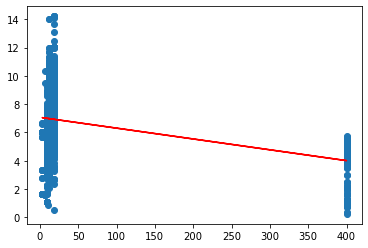

In [64]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)

    return(y_gen)

#Generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(X, a, b)

#Plot the graph
plt.scatter(X, Y)
plt.plot(X, y_gen2, color='red')
plt.show()

From the above regression line we observe that there is a negative correlation between Weight_Kg and avg_price_per_kg as can be concluded from the negative slope and shape of the line, moving from left to right. We also observe that given y = a + bx, when x = 0, the y-intercecpt is R7.

#### 5.1.4. Assessing our results

In [65]:
# calculate errors
errors = np.array(Y - y_gen2)
np.round(errors, 2)

array([ 1.58, -2.44, -0.89, ..., -1.33, -4.21,  0.63])

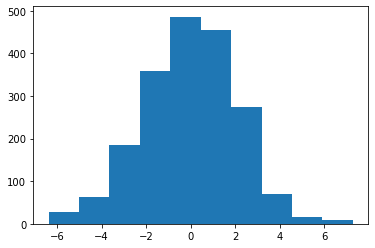

In [66]:
plt.hist(errors)
plt.show()

It seems that our prediction is quote accurate only considering the training data and only considering the weight column as an independent variable. This however is not satisfactory since our model is univariate and multiple conditions need to be taken into account.

In [67]:
# Overall error of the fit
print('Residual Sum of Squares:', (errors ** 2).sum())

Residual Sum of Squares: 8449.274468123662


In [68]:
#Root Mean Squared Error to assess fit of model
print('RMSE:', np.sqrt((1/len(X))*(errors ** 2).sum()))

RMSE: 2.0853228820620813


The Simple Linear Regression Model's RMSE is ~ 2.0853 units from a perfect fit (RMSE=0)

In [69]:
# R Squared method to assess fit of model
print("R^2:", 1 - (errors**2).sum()/((Y - y_bar)**2).sum())

R^2: 0.11758322933542165


R Squared is closer to 0 than it is to 1. This indicates that the regression does not explain much of the variability in the response.

#### 5.1.5. Conclusion

Our assessment of the Simple Linear Regression model showed an unsatisfactory RMSE of 2.08 when tested on the 20% unseeen data. This is not in-line with our goal. We will continue to investigate more regression models to see if we can build one that makes even more precise predictions.

### 5.2. A multivariate linear regression model using sklearn Linear Regression

#### 5.2.1. Description of model

The multivariate linear regression model (MLR) takes the univariate regression model a step further by adding more p predictor variables to the model. The higher dimensionality of an MLR results in a hyperplane. Given a p-dimensional space, where p > 3, human beings cannot fathom any dimension greater than the third. Mathematically, MLR adds p-dimensions simply by adding an Xj and corresponding Beta_j for each p predictor variable, where j is an element of the set [1,p].

#### 5.2.2. Building and fitting the model

In [70]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [71]:
# create model object
LR_train = LinearRegression()

In [72]:
# train model
LR_train.fit(X_train80, y_train80)

LinearRegression()

In [73]:
# extract model intercept
beta_0 = float(LR_train.intercept_)
print("Intercept:", beta_0)

Intercept: 1146807276.6419442


In [74]:
# extract and show model coeffs
beta_js = pd.DataFrame(LR_train.coef_, X_train80.columns, columns=['Coefficient'])
beta_js.head(7)

,Coefficient
Weight_Kg,-3.822691e+08
Total_Qty_Sold,-2.462712e-04
Stock_On_Hand,-7.622519e-05
Province_EASTERN_CAPE,-1.648599e+00
Province_NATAL,-2.519189e+00
Province_ORANGE_FREE_STATE,-2.007895e+00
Province_TRANSVAAL,-1.230590e+00


#### 5.2.3. Assessing our results

In [75]:
#Importing the necessary packages
from sklearn import metrics
import math

In [76]:
#Working out the RMSE of the test data
y_pred = LR_train.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('The RMSE of the test data is: ' + str(RMSE))

The RMSE of the test data is: 1.35556092708849


#### 5.2.4. Making predictions on the test data

In [77]:
# Making the prediction
y_submission = LR_train.predict(test_submission_set)

In [78]:
# Minimizing the effect of outliers
i = 0 
for prediction in y_submission:
    if prediction < 0.25:
        y_submission[i] == 0.25
    elif prediction > 15:
        y_submission[i] == 15
    i += 1      

In [79]:
#Creating an index list
index_list = []
for i in range(1,686):
    index_list.append(i)

In [80]:
#Putting the predictions with the index in a DataFrame
LR_submission_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': y_submission})

In [81]:
LR_submission_DF.head()

,Index,avg_price_per_kg
0,1,8.696146
1,2,9.018347
2,3,8.387762
3,4,7.642698
4,5,8.216034


In [82]:
#Saving the DataFrame as as csv
LR_submission_DF.to_csv(r'LR_submission_DF.csv', index = False)

#### 5.2.5. Conclusion
Our assessment of the Multivariate Linear Regression model showed a satisfactory RMSE of 1.35 when tested on the 20% unseeen data. We will continue to investigate more regression models to see if we can build one that makes even more precise predictions.


### 5.3. A multivariate linear regression model using statsmodels

#### 5.3.1. Description of the model

The Ordinary Least Squares Model is a statistical method of analysis that estimates the relationship between one or more indepedent variables and a dependent variable.The model estimates this relationship by minimizing the difference between the observed values and the predicted values.This difference is a representation of how far our predictions are to the information in our data, this difference is called the Residual Sum of Squares. The lower the Residual Sum of Squares is, the closer our predictions are to the truth displayed in our data. The metric that will be used in this model to assess how far our predictions deviate from the observed data is called the Root Mean Square error, which is the stanadard deviation of the residuals.

#### 5.3.2. Building and training the model

In [83]:
#Importing the statsmodels package
import statsmodels.formula.api as sm

The Date is still giving us the same error even though we removed the day:"PatsyError:numbers besides '0' and '1' are only allowed with**".It was then left out of our stats models. It also stated that "Province_W.CAPE-BERGRIVER_ETC" was not defined,we dropped that column as well.

In [84]:
#Creating a copy of the train to work on, so any changes we make do not affect the original dataframe
train2 = train.copy()

In [85]:
#Droping the column from our copy of the train dataframe. 
train2 = train2[train2["Province_W.CAPE-BERGRIVER_ETC"] == 1]
train2 = train2.drop(["Province_W.CAPE-BERGRIVER_ETC"], axis=1)


In [86]:
#Generating the regression string
formula_str = train2.columns[-1]+' ~ '+'+'.join(train2.columns[0:27]); formula_str

'avg_price_per_kg ~ Weight_Kg+Total_Qty_Sold+Stock_On_Hand+Province_EASTERN_CAPE+Province_NATAL+Province_ORANGE_FREE_STATE+Province_TRANSVAAL+Province_WEST_COAST+Container_DT063+Container_EC120+Container_EF120+Container_EG140+Container_IA400+Container_JE090+Container_JG110+Container_M4183+Container_M6125+Container_M9125+Size_Grade_1M+Size_Grade_1S+Size_Grade_1U+Size_Grade_1X+Size_Grade_2L+Size_Grade_2M+Size_Grade_2S+Size_Grade_2U+Size_Grade_2X'

In [87]:
train2.head()

,Weight_Kg,Total_Qty_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_WEST_COAST,Container_DT063,Container_EC120,...,Date_2020-02,Date_2020-03,Date_2020-04,Date_2020-05,Date_2020-06,Date_2020-07,Date_2020-08,Date_2020-09,Date_2020-10,avg_price_per_kg
24,9.0,18,1506,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6.11
162,12.0,23,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,8.67
278,9.0,90,220,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6.11
291,400.0,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5.67
589,9.0,2,358,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5.56


In [88]:
#Constructing the model using Ordinary Least Squares regression model
model2 = sm.ols(formula = formula_str, data = train2)


In [89]:
#Fitting the OLS model we constructed above
fitted = model2.fit()

#### 5.3.3 Assessing our results

In [90]:
from statsmodels.tools.eval_measures import rmse

# fit your model which you have already done

# now generate predictions
ypred = fitted.predict(train2)

# calc rmse
#rmse = rmse(train2.columns[-1], ypred)

In [91]:
fitted.mse_model 

74.26917732186533

In [92]:
rmse = 74.26917732186531 **(1/2)

In [93]:
rmse

8.617956679043202

#### 5.3.4 Conclusion

We decided to not submit our stats model because as seen above the RMSE for the training data is already quite high. Even after we removed days from our dates the stats model presented us with errors about the date:"PatsyError:numbers besides '0' and '1' are only allowed with**". It also did not recognise this column("Province_W.CAPE-BERGRIVER_ETC")which the other models we instantiated did not have same errors that stats models presented. Our data for this model ended up being vastly different from the data we trained the other models on.

### 5.4. Multivariate regression model uing sklearn.SVR

#### 5.4.1 Description of the model

SVR tries to find a line/hyperplane (in multidimensional space) that separates two classes. Then it classifies the new point depending on whether it lies on the positive or negative side of the hyperplane depending on the classes to predict.

Consider  two  lines as the decision boundary and another line in between the two lines as the hyperplane. Our objective is to basically consider the points that are within the decision boundary line. SVR chooses the  best fit line as the hyperplane that has a maximum number of points.

The main aim is to decide a decision boundary at a distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.SVR takes only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.

#### 5.4.2 Building and fitting the model

In [74]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [75]:
# Instantiate support vector regression model
sv_reg_train = SVR(kernel='rbf', gamma='auto')

In [76]:
sv_reg_train.fit(X_train80,y_train80)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### 5.4.3 Assessing our results

In [77]:
y_pred = sv_reg_train.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE:  1.7448266774345647


#### 5.4.4 Making predictions on the test data

In [78]:
Z_submission = sv_reg_train.predict(test_submission_set)

In [79]:
#Creating an index list
index_list = []
for i in range(1,686):
    index_list.append(i)

In [80]:
#Putting the predictions with the index in a DataFrame
SVR_submission_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': Z_submission})

In [81]:
SVR_submission_DF.head()

,Index,avg_price_per_kg
0,1,4.899589
1,2,8.065270
2,3,6.390214
3,4,8.649437
4,5,7.032570


In [82]:
#Saving the DataFrame as as csv
SVR_submission_DF.to_csv(r'SVR_submission.csv', index = False)

#### 5.4.5 Conclusion

It is clear that the prediction based on support vector regression method more accurate compared to the Stats model however The multivariate linear regression model has a lower RMSE compared to SVR. 

### 5.5. Multivariate regression model using sklearn.decisiontreeregressor

#### 5.5.1 Description of the model

Decesion Trees are like a flow-chart-like tree structure where the top of the tree(which is known as the root node) or internal node represents the feauture, the branch represents a decesion rule and each node represents the outcome. Decesion trees partition data into different sections on the basis of the attribute value. It partitions these in a recursive manner called recursive partitioning. The basic idea of a decesion tree algorithm is to select the b est attribute , make that attribute a decesion node and break it into smaller subsets. It then starts the tree building by repeating this process recursively for each child until certain conditions are met.The perfomance of the model is then evaluated. While decesion trees are good for feature engineering such as predicting missing values, they are quite biased and the small variation in the data can result in a different decesion tree but can be reduced by boosting algorithms seen below in the notebook:

#### 5.5.2 Building and fitting the model

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error # for checking performance

We begin with all of our training data at the root node and then partition the data into smaller subsets which form the branches.

In [89]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3)

In [90]:
regr_tree.fit(X_train80,y_train80)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### 5.5.3 Assessing our results

We evaluate model performance by calculating how close its predictions on the unseen x_test observations are to the actual output y_test.



In [91]:
y_pred = regr_tree.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  1.5180935796989674


In [92]:
#Creating an index list
index_list = []
for i in range(1,686):
    index_list.append(i)

In [93]:
c_submission = sv_reg_train.predict(test_submission_set)

In [94]:
#Putting the predictions with the index in a DataFrame
DT_submission_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': c_submission})

In [95]:
DT_submission_DF.head()

,Index,avg_price_per_kg
0,1,4.899589
1,2,8.065270
2,3,6.390214
3,4,8.649437
4,5,7.032570


In [96]:
DT_submission_DF[DT_submission_DF['avg_price_per_kg']==DT_submission_DF['avg_price_per_kg'].max()]

,Index,avg_price_per_kg
161,162,9.380569


In [97]:
DT_submission_DF[DT_submission_DF['avg_price_per_kg']==DT_submission_DF['avg_price_per_kg'].min()]

,Index,avg_price_per_kg
185,186,1.93242


In [98]:
#Saving the DataFrame as as csv
DT_submission_DF.to_csv(r'DT_submission.csv', index = False)

#### 5.5.4 Conclusion

The decesion tree model gave an RMSE of 1.518 which is still higher than the RMSE of the the multivariate linear regression model.This shows that the residuals for the Decesion tree model are more  spread out.


## 5.6. Ensemble model: Voting

#### 5.6.1 Description of the model

Ensemble models combine other models to minimize the variance of the individual models and improve the overall perfomance. The Ensemble Voting model is a heterogeneous model, these types of models ae able to combine different types of models, in our case, Linear, SVR and Decision Tree models. The Voting ensemble was chosen because it we can adjust the weight that each model hold, thus pitting less weight on models that perform poorly and maximizing the advantages of the better performing models. The voting model gets the average of the performance of all our contributing models by considering the Root Mean Square Error of each individual model. The Root Mean Square Error of the Voting model is the average Root Mean Square Error of all the models utilized.

#### 5.6.2 Building and fitting the model

In [114]:
#Importing the voting regressor from sklearn.ensemble
from sklearn.ensemble import VotingRegressor

In [115]:
#Stating the models that will be included in our ensemble module as a list of tuples
models = [("LR",LR_train),("DT",regr_tree),("SVR",sv_reg_train)]

#Specifying weights for weighted model averaging
model_weightings = np.array([0.4,0.4,0.2])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

In [116]:
#Fitting the ensemble model with train data
v_reg.fit(X_train,y_train)


VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=3)),
                            ('SVR', SVR(gamma='auto'))],
                weights=array([0.4, 0.4, 0.2]))

#### 5.6.3 Assessing our results

In [117]:
#Predicting the y variable for out test data
#Printing the RMSE of the ensemble method
y_pred = v_reg.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  1.2763711243055285


#### 5.6.4 Making predictions on the test data

In [118]:
# Making the prediction
y_submission = v_reg.predict(test_submission_set)

In [119]:
# Minimizing the effect of outliers
i = 0 
for prediction in y_submission:
    if prediction < 0.25:
        y_submission[i] == 0.25
    elif prediction > 15:
        y_submission[i] == 15
    i += 1 

In [120]:
#Creating an index list
index_list = []
for i in range(1,686):
    index_list.append(i)
    

In [121]:
#Putting the predictions with the index in a DataFrame
ensemble_sub_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': y_submission})
ensemble_sub_DF.head()

,Index,avg_price_per_kg
0,1,7.683619
1,2,8.492106
2,3,7.854327
3,4,8.061492
4,5,7.985876


In [122]:
#Saving the DataFrame as as csv
ensemble_sub_DF.to_csv('Ensemble_Submission.csv', index = False)

In [123]:
#saving the Dataframe after removing the outliers
ensemble_sub_DF.to_csv('Ensemble_Submission2.csv', index = False)

#### 5.6.5 Conclusion

The Root Mean Square Error for the training Data is lower than that of each individual model, This shows that the Voting Ensemble model does indeed minimize the variance and improve overall performace.

### 5.7. Random Forest

#### 5.7.1 Description of the model

The Random Forest Model is a homogeneous ensemble method, this means it can take a collection of models to improve performance however the models have to be the same type.The Random Forest model are is built by various decision tree models. Overfitting is less likely to occur when utilising a Random Forest Model and it improves overall perfomance than a single Decision Tree.

#### 5.7.2 Building and fitting the model

In [124]:
#Importing the Random Forest Model
from sklearn.ensemble import RandomForestRegressor
#fitting a Random Forest Model
RF = RandomForestRegressor(n_estimators=2500, max_depth=45)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=2500)

#### 5.7.3 Assessing our results

In [125]:
#Importing mean square error from sklearn metrics
from sklearn.metrics import mean_squared_error

#Predicting the y values
y_pred_RF = RF.predict(X_test)

#Calculating the RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_RF)))


RMSE: 0.40144331505070346


#### 5.7.4 Making predictions on the test data

In [126]:
# Making the prediction
y_submission = RF.predict(test_submission_set)

In [127]:
# Minimizing the effect of outliers
i = 0 
for prediction in y_submission:
    if prediction < 0.25:
        y_submission[i] == 0.25
    elif prediction > 15:
        y_submission[i] == 15
    i += 1 

In [128]:
#Creating an index list
index_list = []
for i in range(1,686):
    index_list.append(i)
    

In [129]:
#Putting the predictions with the index in a DataFrame
RandomForest_sub_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': y_submission})
RandomForest_sub_DF.head()

,Index,avg_price_per_kg
0,1,9.911816
1,2,9.159152
2,3,10.015732
3,4,8.129948
4,5,7.972772


In [130]:
#Saving the DataFrame as as csv
RandomForest_sub_DF.to_csv('RandomForest_Submission.csv', index = False)

#### 5.7.5 Conclusion

The Random Forest Model is the best performing model we have. It has the lowest RMSE on the training data and the unseen data on Kaggle.

### 5.8. Adaboost Classifier

#### 5.8.1  Description of the model

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset. It can be used in conjunction with many other types of learning algorithms to improve performance. 
When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative difficulty of each training sample is fed into the tree growing algorithm such that later trees tend to focus on problems that are harder to classify.

#### 5.8.2 Building and fitting the model

In [101]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [102]:
from sklearn.ensemble import AdaBoostRegressor

In [103]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=3)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree)

In [104]:
bst_reg.fit(X_train80.values,y_train80)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_s

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
from sklearn.ensemble import BaggingRegressor

In [107]:
d_tree = DecisionTreeRegressor(max_depth=4)
# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = d_tree)

In [108]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y


In [109]:
bag_reg.fit(X_train.values,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=4,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

#### 5.8.3 Assessing our results

In [111]:
y_pred = bst_reg.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))



RMSE:  1.5046267677667537


In [112]:
#Creating an index list
index_list = []
for i in range(1,686):
    index_list.append(i)

In [113]:
K_submission = bag_reg.predict(test_submission_set)
L_submission = bst_reg.predict(test_submission_set)

In [114]:
#Putting the predictions with the index in a DataFrame
Ada_submission_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': K_submission})
Boost_submission_DF = pd.DataFrame({'Index':index_list, 'avg_price_per_kg': L_submission})

In [115]:
Ada_submission_DF.head()

,Index,avg_price_per_kg
0,1,8.690175
1,2,8.669875
2,3,8.690175
3,4,8.669875
4,5,8.669875


In [116]:
Boost_submission_DF.head()

,Index,avg_price_per_kg
0,1,7.339000
1,2,8.145706
2,3,8.278893
3,4,8.263884
4,5,8.145706


In [117]:
Ada_submission_DF.to_csv(r'Ada_submission.csv', index = False)

In [118]:
Boost_submission_DF.to_csv(r'Boost_submission.csv', index = False)

#### 5.8.4 Conclusion

The boosting did improve the RMSE of the decesion tree however it is not such a significancant improvement 

## 6. Conclusion <a name="conclude"></a>

### 6.1. Steps we took 
We imported, explored, cleaned and split the data for suitable use. Thereafter we built 7 multivariate regression models and assessed them all with unseen data. We also submitted our best model to Kaggle and have built an API and hosted it in EC2 in order to share our finding with the world.

### 6.2. Our results
At the end of the day the Random Forest Model predicted the most accurately with an RMSE of only 0.40 as measured by the 20% unseen data and an RMSE of 1.05 as measured by Kaggle.

This model placed us 36th out of the 37 teams which participated in the Kaggle competition with the winning team achieving an RMSE of only 0.004. We are grateful that we could participate in this competition and to thereby encourage accurate model building.

### 6.3. What we learnt
Through this excercise we learned how to prepare data for building and training machine learning models and to to split the data so that we can assess our models on unseen data. 

We learned to build various regression models as well as how to assess them.

We learned to participate in a Kaggle competition and how to collaborate with others via Teams, WhatsApp, Vanilla Forums and a Trello board.